###### FWAV Linkage Computer

This `sagemath` notebook follows the computation outlined in [arXiv:2111.02118](https://arxiv.org/abs/2111.02118) for a linkage used in the implementation of a "RoboFalcon". The main data are set in the first cell, and the computation follows. The results of the computation should be compared to Table 1 of the manuscript.

All lengths are given in millimetres, but one could choose other consistent units of length.

This version implements morphology and technique designed by Misha van Anders

In [1]:
# These are quantities that are fixed by the flapping mechanism
x_At = 125.0
x_Ae = 75.0

# These are lengths that are fixed by the bird's morphology; humerus and radial lengths
l_h = 131.589877
l_r = 119.5863244

# These are lengths that are fixed by the form of the linkage mechanism
b = 30.0
f = 45.0

# These are quantities that are fixed by morphology/flapping technique
theta_st = pi*76.65468291/180.0
theta_se = pi*160.191579/180.0
theta_et = pi*83.67920085/180.0
theta_ee = pi*120.1156549/180.0
theta_wt = pi*74.23773306/180.0
theta_we = pi*153.1353667/180.0

In [2]:
# Unknown linkage variables to solve for
a,d,e,h,i,j = var('a d e h i j')

In [3]:
# First we will work on the shoulder section
# Equation 14 in tucked position
LHS14t = (x_At-(l_h-d)*n(cos(theta_st),15))^2+(l_h-d)^2*n(sin(theta_st)^2,15)

# Equation 14 in extended position
LHS14e = (x_Ae-(l_h-d)*n(cos(theta_se),15))^2+(l_h-d)^2*n(sin(theta_se)^2,15)

# The right hand side is angle invariant
RHS14 = (b+a)^2

# Construct an equation that isolates d
DEQ = LHS14t - LHS14e == 0

In [4]:
# This finds the possible values of d
d_sols = solve(DEQ,d,solution_dict=True)

# There are two solutions
d_0 = d_sols[0][d]
d_1 = d_sols[1][d]

In [5]:
# The '1' solution is the one that makes sense
d_1=d_1.n()
print(d_1)

81.3044688254595


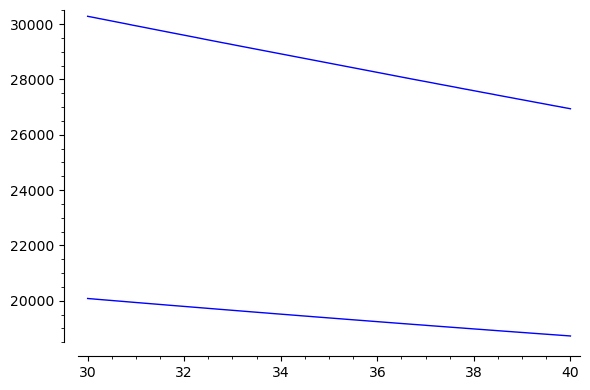

In [6]:
# To check this we can plot the two expressions involving d
sum([plot(LHS14t,(d,30,40)),plot(LHS14e,(d,30,40))])

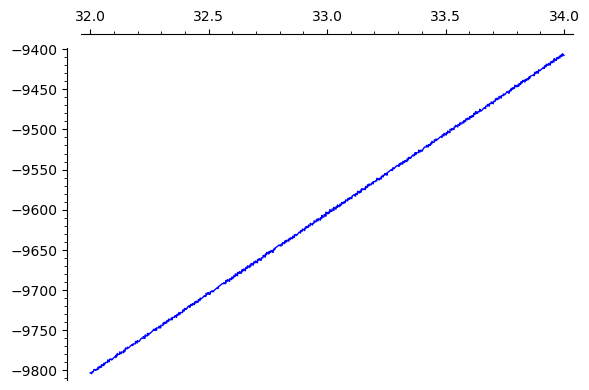

In [7]:
# The plot shows a crossing near where we expected. Here it is easier to see.
plot(DEQ,(d,32,34))

In [8]:
# We got the solution for d, now it is relatively straightforward to get the solution for a
# First we construct the equation
ALHS = RHS14-LHS14e
print(ALHS)

(a + 30.0000000000000)^2 - 0.1148*(d - 131.589877000000)^2 - (-0.9408*d + 198.8)^2


In [9]:
# Now we make the substitution of the solution we found for d
AEQ = ALHS.subs(d==d_1)==0.0
print(AEQ)

# Next we can solve the equation for a
a_sols = solve(AEQ,a,solution_dict=True)

# We get two solutions
a_0 = a_sols[0][a]
a_1 = a_sols[1][a]

(a + 30.0000000000000)^2 - 15250. == 0.000000000000000


In [10]:
# We then check to see which one is the right solution
print((a_0.n(),a_1.n()))

(-153.503036399920, 93.5030363999201)


In [11]:
# In this case the solution is the '1'
a_1 = a_1.n()
print(a_1)

93.5030363999201


In [12]:
# Next we will work on the humerus section

# Equation 15 in the extended position
LHS15e = (d*n(cos(theta_se),15)+i*n(cos(theta_ee-theta_se),15)-b/(b+a)*(x_Ae-(l_h-d)*n(cos(theta_se),15)))^2+(d*n(sin(theta_se),15)-i*n(sin(theta_ee-theta_se),15)+b/(b+a)*(l_h-d)*n(sin(theta_se),15))^2

# Equation 15 in the tucked position
LHS15t = (d*n(cos(theta_st),15)+i*n(cos(theta_et-theta_st),15)-b/(b+a)*(x_At-(l_h-d)*n(cos(theta_st),15)))^2+(d*n(sin(theta_st),15)-i*n(sin(theta_et-theta_st),15)+b/(b+a)*(l_h-d)*n(sin(theta_st),15))^2

# The right hand side is angle invariant
RHS15 = e^2

In [13]:
# Solve for i
ILHS = LHS15e-LHS15t 
IEQ = ILHS.subs(d==d_1).subs(a==a_1) == 0
print(IEQ)
i_sols = solve(IEQ,i,solution_dict=True)
i_0 = i_sols[0][i]
i_1 = i_sols[1][i]

-(0.9925*i - 8.780)^2 + (0.7652*i - 106.2)^2 + (0.6438*i + 31.69)^2 - (-0.1223*i + 91.00)^2 == 0


In [14]:
# We want the '0' solution
print(i_0.n())
i_0 = i_0.n()

47.8584293806925


In [15]:
# Now solve for e
ELHS = RHS15-LHS15e
EEQ = ELHS.subs(d==d_1).subs(a==a_1).subs(i==i_0) == 0
e_sols = solve(EEQ,e,solution_dict=True)
e_0 = e_sols[0][e]
e_1 = e_sols[1][e]

In [16]:
# We want the '1' solution
print(e_1.n())
e_1 = e_1.n()

93.5334164884401


In [17]:
# Finally we will solve the wrist section

# Equation 16 in the extended position
LHS16e = ((f/e)*(d*n(cos(theta_se),15)+i*n(cos(theta_ee-theta_se),15)-b/(b+a)*(x_Ae-(l_h-d)*n(cos(theta_se),15)))-h*n(cos(theta_we-theta_ee+theta_se),15)+(l_r+i)*n(cos(theta_ee-theta_se),15))^2+((f/e)*(d*n(sin(theta_se),15)-i*n(sin(theta_ee-theta_se),15)+b/(b+a)*(l_h-d)*n(sin(theta_se),15))-h*n(sin(theta_we-theta_ee+theta_se),15)-(l_r+i)*n(sin(theta_ee-theta_se),15))^2

# Equation 16 in the tucked position
LHS16t = ((f/e)*(d*n(cos(theta_st),15)+i*n(cos(theta_et-theta_st),15)-b/(b+a)*(x_At-(l_h-d)*n(cos(theta_st),15)))-h*n(cos(theta_wt-theta_et+theta_st),15)+(l_r+i)*n(cos(theta_et-theta_st),15))^2+((f/e)*(d*n(sin(theta_st),15)-i*n(sin(theta_et-theta_st),15)+b/(b+a)*(l_h-d)*n(sin(theta_st),15))-h*n(sin(theta_wt-theta_et+theta_st),15)-(l_r+i)*n(sin(theta_et-theta_st),15))^2

# The right hand side is angle invariant
RHS16 = j^2

In [18]:
# Solve for i
HLHS = LHS16e-LHS16t 
HEQ = HLHS.subs(d==d_1).subs(a==a_1).subs(i==i_0).subs(e==e_1) == 0
print(HEQ)
h_sols = solve(HEQ,h,solution_dict=True)
h_0 = h_sols[0][h]
h_1 = h_sols[1][h]

(0.9735*h + 94.65)^2 + (0.2287*h + 137.9)^2 - (-0.3873*h + 184.8)^2 - (-0.9220*h + 20.48)^2 == 0


In [19]:
# We want the '0' solution
print(h_0.n())
h_0 = h_0.n()

15.4330995306373


In [20]:
# Lastly, we will solve for j
# Now solve for e
JLHS = RHS16-LHS16e
JEQ = JLHS.subs(d==d_1).subs(a==a_1).subs(i==i_0).subs(e==e_1).subs(h==h_0) == 0
j_sols = solve(JEQ,j,solution_dict=True)
j_0 = j_sols[0][j]
j_1 = j_sols[1][j]

In [21]:
# We want the '0' solution
print(j_1.n())
j_0 = j_0.n()

178.946919504081
